*italicized text*# Graph Data Analytics

In [ ]:
#!conda install networkx --yes

In [5]:
!pip install networkx==2.4

  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


### Calculate page rank by using simple degree centrality

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


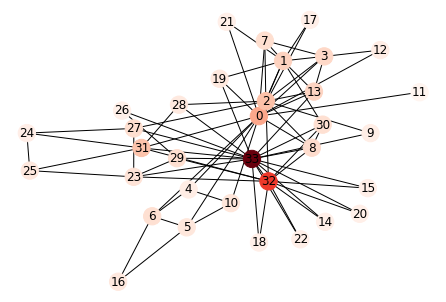

In [4]:
def simple_pagerank(G, iter = 100):
    p = np.array([1 for i in G.nodes()])
    
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                Aji = G.number_of_edges(i,j)
                Cvj = p[j]
                dj = G.degree(j)
                p[i] += Aji * (Cvj/dj) # formula of pagerank
        norm = sum(p)
        p = p/norm
    return p
G = nx.karate_club_graph()
print(nx.info(G))
values = simple_pagerank(G)
nx.draw(G,cmap=plt.get_cmap('Reds'),node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


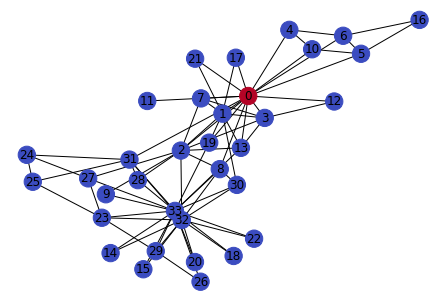

In [5]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [6]:
G = nx.read_edgelist("gr0.California.edegs.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 6175
Number of edges: 15969
Average degree:   5.1721
Name: 
Type: Graph
Number of nodes: 50
Number of edges: 42
Average degree:   1.6800


In [8]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

(50,)


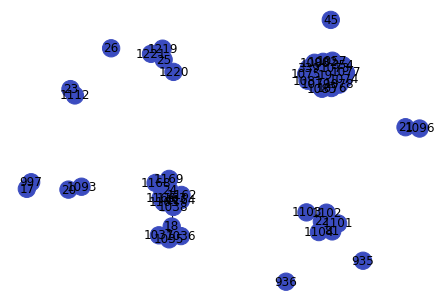

In [8]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)